# Hyperbolic Geometry Exploration

Most of the code in this notebook is strongly based on the [examples provided by Hyperbolic library](https://github.com/cduck/hyperbolic/tree/master/examples).

In [8]:
pip install jupyter

  Obtaining dependency information for notebook from https://files.pythonhosted.org/packages/85/76/51777158391e1784cc5a892ff355fd0a0b0b5189aeffce9baf51f514b9a2/notebook-7.0.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for nbconvert from https://files.pythonhosted.org/packages/51/bd/ede955c9e981abf6d0e12a7583fd0f9256eedfb461073f25045770f3e717/nbconvert-7.7.3-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from htt

In [9]:
pip install hyperbolic

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c9/57/3cb8131a0e6d559501e088d3e685f4122e9ff9104c4b63e4dfd3a577b491/numpy-1.25.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for drawsvg~=2.0 from https://files.pythonhosted.org/packages/27/4f/65d72a014026495d8d2847e66bbe542cf899e50f087a50e0abab9c58ef3c/drawsvg-2.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 32.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install quads

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7e/2c/1e25437f4419f2828bbd213be42c8fd23a3b795c5c4bb776987d177fc615/matplotlib-3.7.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/92/4d/fe7a7098d98a8889252105193f5e869532f9dc37e39d917a82d2b0b874a1/contourpy-1.1.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e8/e0/d1a65471a945b0764ee17ce4afb59af8761b33c4418ca35687639315fcb7/fonttools-4.42.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/pack

In [15]:
import drawsvg as draw
from drawsvg import Drawing
from hyperbolic import euclid, util
from hyperbolic.poincare import *
import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import quads
import random

### Hyperbolic Line and Hyperbolic Line Segment

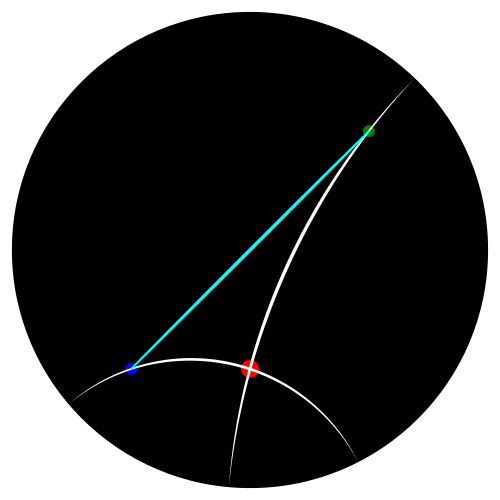

In [19]:
p1 = Point(0.0,  0.5)
p2 = Point(0.5, -0.5)
p3 = Point(-0.5, 0.5)

# Create hyperbolic line (segment) connecting p1 and p2.
# If segment==false, the hyperbolic line will extend towards
# the boundaries of the Poincaré disk.
p1p2_line = Line.from_points(*p1, *p2, segment=False)
p1p3_line = Line.from_points(*p1, *p3, segment=False)
p2p3_line = Line.from_points(*p2, *p3, segment=True)

width = height = 2.1
d = Drawing(width, height, origin='center')

# Draws a circle with center (0.0, 0.0) and radius 1.0, 
# representing the interior of the Poincaré disk.
center = (0.0, 0.0)
radius = 1.0
d.draw(euclid.Circle(*center, radius), fill='black')

# Draws points in the Poincaré disk
d.draw(p1, hradius=0.1, fill='red')
d.draw(p2, hradius=0.1, fill='green')
d.draw(p3, hradius=0.1, fill='blue')

# Draw hyperbolic line connecting p1 and p2;
# notice that the line is infinite since it
# is extended towards the boundary of the disk.
d.draw(p1p2_line, hwidth=0.03, fill='white')
d.draw(p1p3_line, hwidth=0.03, fill='white')
# Draw  hyperbolic line Segment i.e., segment
# with finite extent
d.draw(p2p3_line, hwidth=0.03, fill='cyan')

d.set_render_size(w=500)
d.save_svg('hyperbolic_line.svg')
d # This will render the image in the output cell

### Hyperbolic Hexagon

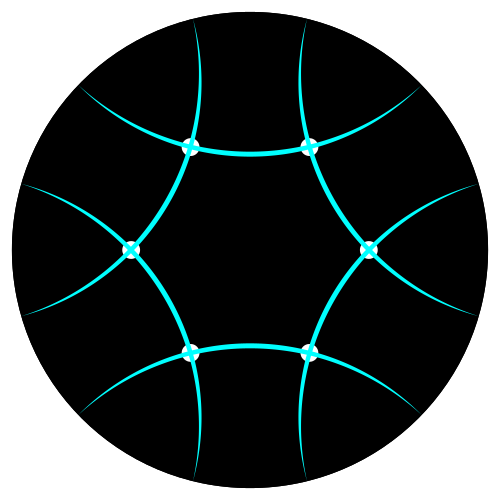

In [20]:
r = 0.5
points = []
for idx in range(6):
    angle = math.radians(idx * 60)
    points.append(Point(r * math.cos(angle), r * math.sin(angle)))

lines = []
for idx in range(6):
    start = idx % 6
    end = (idx + 1) % 6
    lines.append(Line.from_points(*points[start], *points[end], segment=False))

# Draws a circle with center (0.0, 0.0) and radius 1.0, 
# representing the interior of the Poincaré disk.
center = (0.0, 0.0)
radius = 1.0
d.draw(euclid.Circle(*center, radius), fill='black')

for point in points:
    d.draw(point, hradius=0.1, fill='white')
    
for line in lines:
    d.draw(line, hwidth=0.05, fill='cyan')

d.set_render_size(w=500)
d.save_svg('hyperbolic_hexagon.svg')
d # This will render the image in the output cell

### Euclidean Quadtree

In [25]:
# Domain centered at the origin and in range [-1; 1]
tree = quads.QuadTree((0, 0), 2.0, 2.0)

# Generate points inside Poincaré disk
points = []
num_points = 100

while len(points) != num_points:
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    
    # Test if point is inside Poincaré disk,
    # but not on the boundary.
    if x**2 + y**2 < 1.0:
        points.append((x, y))
        tree.insert((x, y))

points = np.array(points)
start = quads.BoundingBox(min_x=-1, min_y=-1, max_x=1, max_y=1)
# Lib seems to be broken? Center of box from (-1, -1) to (1, 1) should be (0, 0)?
#print(start.center) # Returns (1.0, 1.0), but should be (0, 0) ?
# self.center = Point(self.half_width, self.half_height)

def bbox_center(bounding_box):
    return quads.Point((bounding_box.max_x + bounding_box.min_x) / 2, (bounding_box.max_y + bounding_box.min_y) / 2)

#print(bbox_center(start)) # Seems correct?

def split(parent) -> list:    
    #center = parent.center # Seems to be broken?
    center = bbox_center(parent)
    
    return [ 
        # Upper-Right Node
        quads.BoundingBox(min_x=center.x, min_y=center.y,
                      max_x=center.x + parent.half_width, max_y=center.y + parent.half_height),
        # Upper-Left Node
        quads.BoundingBox(min_x=center.x - parent.half_width, min_y=center.y,
                      max_x=center.x, max_y=center.y + parent.half_height),
        # Lower-Left Node
        quads.BoundingBox(min_x=center.x - parent.half_width, min_y=center.y - parent.half_height,
                      max_x=center.x, max_y=center.y),
        # Lower-Right Node TODO
        quads.BoundingBox(min_x=center.x, min_y=center.y - parent.half_height,
                      max_x=center.x + parent.half_width, max_y=center.y),
    ]
            

split(start)

[<BoundingBox: (0.0, 0.0) to (1.0, 1.0)>,
 <BoundingBox: (-1.0, 0.0) to (0.0, 1.0)>,
 <BoundingBox: (-1.0, -1.0) to (0.0, 0.0)>,
 <BoundingBox: (0.0, -1.0) to (1.0, 0.0)>]

TypeError: list indices must be integers or slices, not tuple

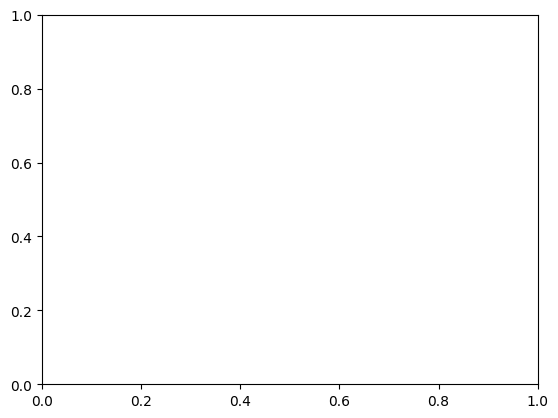

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(
    x=points[:, 0],
    y=points[:, 1],
    marker='o', alpha=0.9, color='red')

for children in split(start):
    ax.add_patch(
        patches.Rectangle(
            xy=(children.min_x, children.min_y),
            width=children.width, height=children.height, linewidth=1,
            color='blue', fill=False))

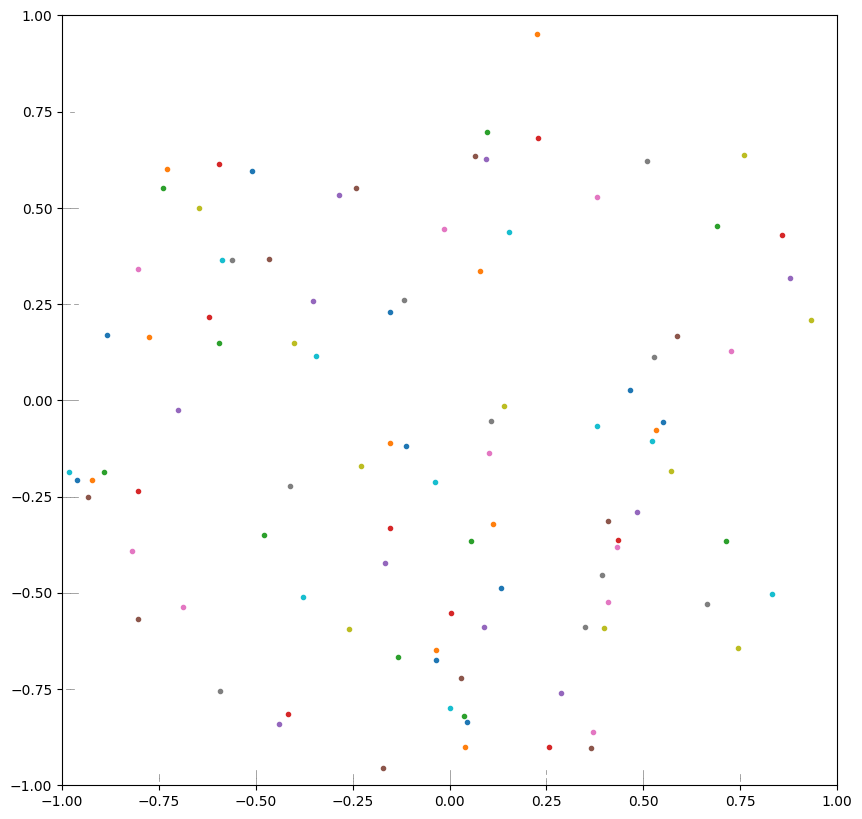

In [26]:
quads.visualize(tree)

### Polar Quadtree (Equal Area Splitting)

In [27]:
def cartesian_to_polar(points):
    """
    Args
        points: ndarray containing points in Cartesian coordinates.
    
    Returns
        ndarray: points in polar coordinates, where the first column is the
        radius and the second column is the angle (in radians).
    """
    assert points.shape[1] == 2
    return np.column_stack((np.sqrt(points[:, 0]**2 + points[:, 1]**2), np.arctan2(points[:, 1], points[:, 0])))

polar_points = cartesian_to_polar(points)
assert points.shape == polar_points.shape

In [28]:
np.max(polar_points[:, 0])

0.9988302783962818

In [29]:
def polar_equal_area_split(min_r, max_r, min_theta, max_theta, alfa=1.0):
    """
    Args
        min_r, max_r (float): polar radius range of current node
        min_theta, max_theta (float): angles (in degrees) range of the current node
    """
    return (np.arccosh((np.cosh(alfa * max_r) + np.cosh(alfa * min_r)) / 2.0) * (1.0 / alfa), (min_theta + max_theta) / 2)

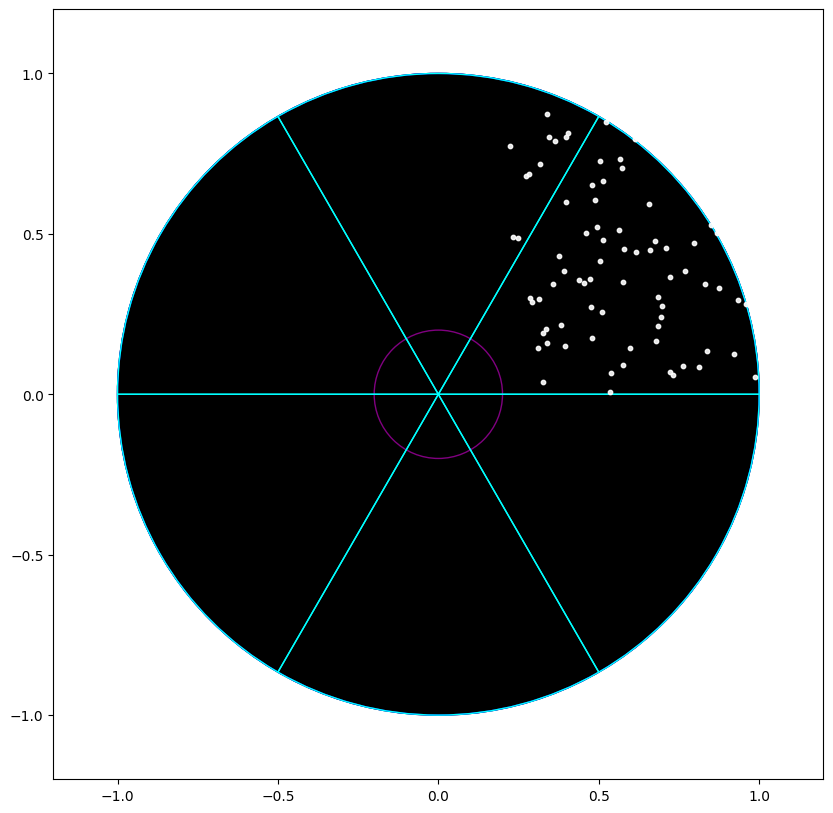

In [35]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), 0.2, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), 1.0, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# Define angles for splitting into 6 sections
angles = [0, 60, 120, 180, 240, 300, 360]  # 6 sections

for i in range(len(angles) - 1):
    theta1 = angles[i]
    theta2 = angles[i + 1]
    wedge = patches.Wedge((0, 0), r=1.0, theta1=theta1, theta2=theta2, color='cyan', fill=False)
    ax.add_patch(wedge)

# Example polar points data
num_points = 100
polar_points = np.random.rand(num_points, 2)
polar_points[:, 0] = 0.2 + 0.8 * polar_points[:, 0]  # Adjust radii

ax.scatter(
    x=polar_points[:, 0],
    y=polar_points[:, 1],
    marker='o', alpha=0.9, color='white', s=10.0)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.show()


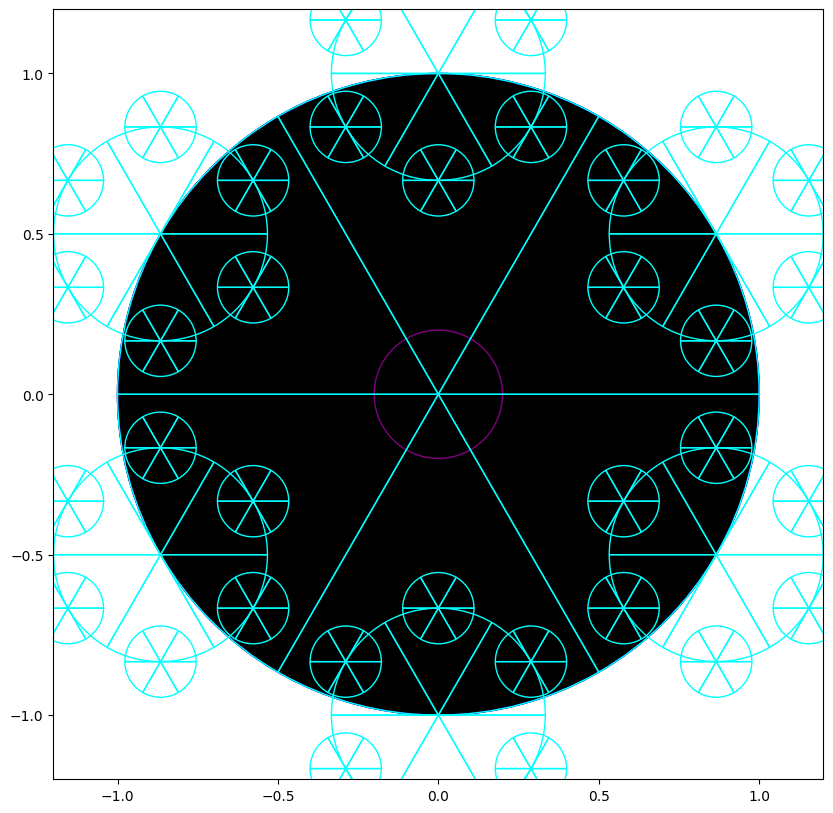

In [36]:
def plot_section(ax, center_x, center_y, radius, num_sections, depth):
    if depth <= 0:
        return

    angles = np.linspace(0, 360, num_sections + 1)
    for i in range(num_sections):
        theta1 = angles[i]
        theta2 = angles[i + 1]
        wedge = patches.Wedge((center_x, center_y), r=radius, theta1=theta1, theta2=theta2, color='cyan', fill=False)
        ax.add_patch(wedge)
        
        # Calculate the coordinates of the center of the new section
        mid_theta = (theta1 + theta2) / 2
        mid_x = center_x + radius * np.cos(np.radians(mid_theta))
        mid_y = center_y + radius * np.sin(np.radians(mid_theta))
        
        # Recursively split the new section
        plot_section(ax, mid_x, mid_y, radius / 3, num_sections, depth - 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), 0.2, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), 1.0, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

plot_section(ax, 0, 0, 1.0, num_sections=6, depth=3)  # Adjust the depth as needed

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

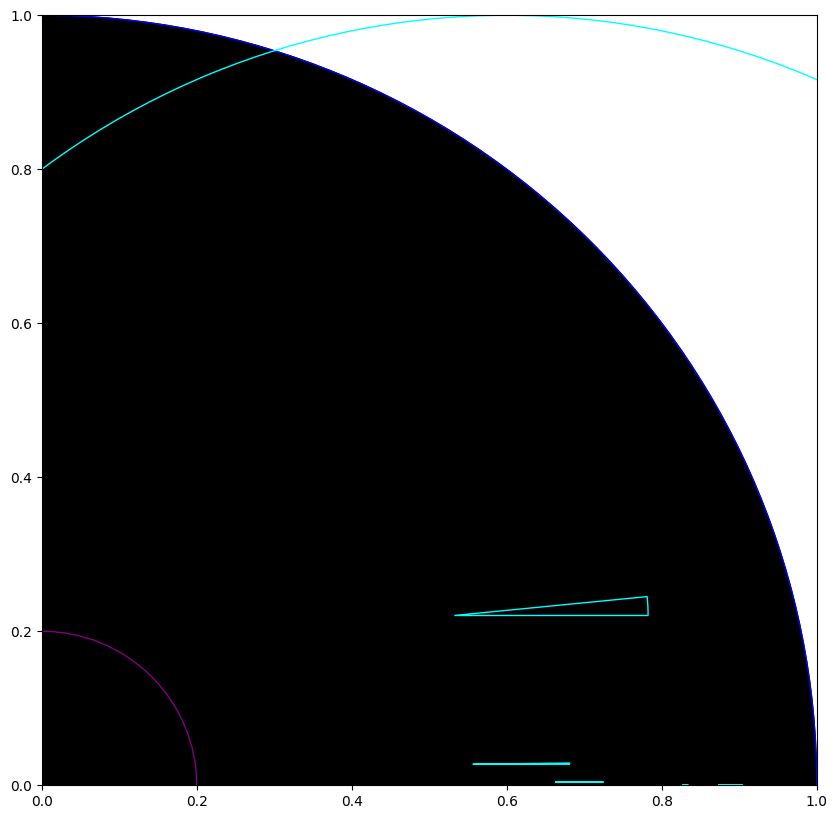

In [37]:
class PolarNode:
    def __init__(self, center_r, center_theta, radius, theta_range):
        self.center_r = center_r
        self.center_theta = center_theta
        self.radius = radius
        self.theta_range = theta_range
        self.children = []

def plot_polar_quadtree(ax, node, polar_points):
    if len(polar_points) == 0:
        return
    
    ax.add_patch(patches.Wedge(
        (node.center_r * np.cos(np.radians(node.center_theta)),
         node.center_r * np.sin(np.radians(node.center_theta))),
        r=node.radius,
        theta1=node.theta_range[0],
        theta2=node.theta_range[1],
        color='cyan', fill=False))

    # Divide the current node into 8 sub-regions
    num_sections = 8
    for i in range(num_sections):
        mid_theta = np.mean(node.theta_range)
        min_theta = node.theta_range[0] + i * (node.theta_range[1] - node.theta_range[0]) / num_sections
        max_theta = node.theta_range[0] + (i + 1) * (node.theta_range[1] - node.theta_range[0]) / num_sections

        sub_points = []
        for point in polar_points:
            if min_theta <= point[1] <= max_theta:
                sub_points.append(point)

        if len(sub_points) > 0:
            mid_r = np.mean([point[0] for point in sub_points])
            child_node = PolarNode(mid_r, mid_theta, node.radius / 2, (min_theta, max_theta))
            node.children.append(child_node)
            plot_polar_quadtree(ax, child_node, sub_points)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Example polar points data
num_points = 100
polar_points = np.random.rand(num_points, 2)
polar_points[:, 0] = 0.2 + 0.8 * polar_points[:, 0]  # Adjust radii

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), 0.2, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), 1.0, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

root_node = PolarNode(0.6, 0, 1.0, (0, 360))  # Initial node
plot_polar_quadtree(ax, root_node, polar_points)

ax.scatter(
    x=[point[0] * np.cos(np.radians(point[1])) for point in polar_points],
    y=[point[0] * np.sin(np.radians(point[1])) for point in polar_points],
    marker='o', alpha=0.9, color='white', s=10.0)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.show()

0.7248357668657963 180.0
0.5245201716079894 90.0
0.3821603969759842 45.0
0.2836626136332433 22.5
0.21772526760788047 11.25
0.17551603229635807 5.625
0.14996485533551296 2.8125
0.13537698533622136 1.40625
0.7248357668657963 180.0
0.5245201716079894 90.0
0.3821603969759842 45.0
0.2836626136332433 22.5
0.21772526760788047 11.25
0.17551603229635807 5.625
0.14996485533551296 2.8125
0.13537698533622136 1.40625


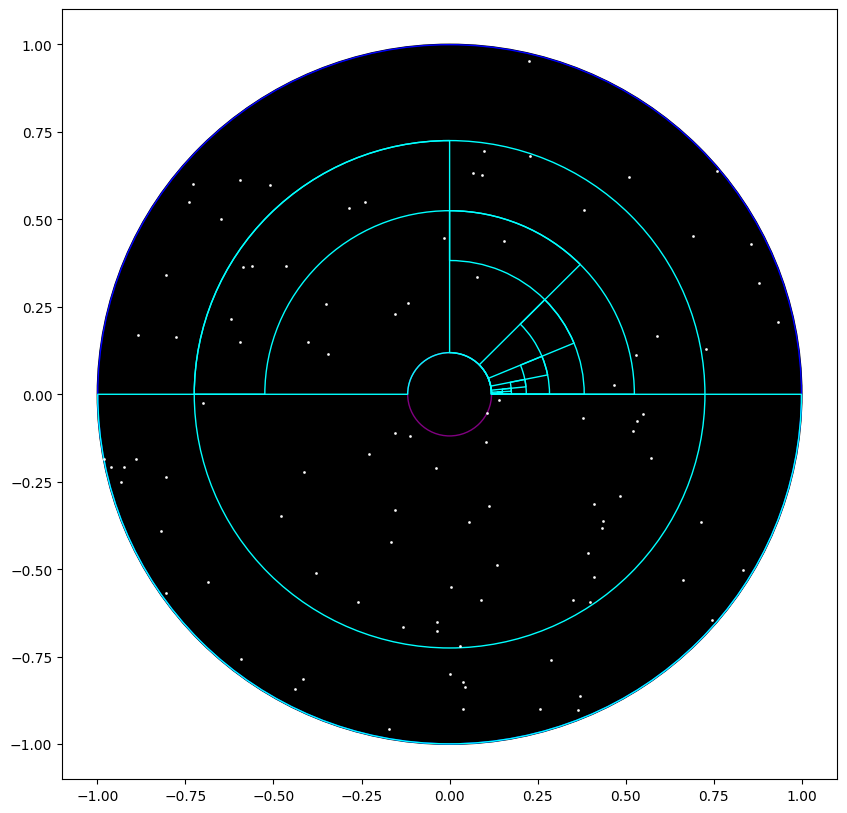

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
#inner_circle = plt.Circle((0, 0), np.min(polar_points[:, 0]), facecolor='red', edgecolor='purple')
inner_circle = plt.Circle((0, 0), np.min(polar_points[:, 0]), color='purple', fill=False)
outer_circle = plt.Circle((0, 0), np.max(polar_points[:, 0]), color='blue', fill=False)

# Angles in **degrees**; draws a wedge starting at r-width and ending at r, ranging from theta1 to theta2
#wedge = patches.Wedge((0, 0), r=0.5, theta1=30, theta2=60, width=0.2, color='cyan', fill=False)
#ax.add_patch(wedge)
ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# TODO: refactor the following into a separate class storing PolarNodes
min_r, max_r, min_theta, max_theta = np.min(polar_points[:, 0]), np.max(polar_points[:, 0]), 0.0, 360
for _ in range(8):
    mid_r, mid_theta = polar_equal_area_split(min_r, max_r, 0.0, max_theta)
    print(mid_r, mid_theta)
    wedge = patches.Wedge((0, 0), r=max_r, theta1=mid_theta, theta2=max_theta, width=(max_r - mid_r), color='cyan', fill=False)
    ax.add_patch(wedge)
    
    max_r = mid_r
    max_theta = mid_theta

min_r, max_r, min_theta, max_theta = np.min(polar_points[:, 0]), np.max(polar_points[:, 0]), 0.0, 360
for _ in range(8):
    mid_r, mid_theta = polar_equal_area_split(min_r, max_r, 0.0, max_theta)
    print(mid_r, mid_theta)
    wedge = patches.Wedge((0, 0), r=mid_r, theta1=0, theta2=mid_theta, width=(mid_r - min_r), color='cyan', fill=False)
    ax.add_patch(wedge)
    
    max_r = mid_r
    max_theta = mid_theta
    
ax.scatter(
    x=[points[:, 0]],
    y=[points[:, 1]],
    marker='o', alpha=0.9, color='white', s=1.0)